In [1]:
ls

1regression.Rproj  CalCensus.csv  Hass.R          regressionOJ.R  Spam.R
airline.csv        dja.csv        OJ.csv          Spacial.R
Autoregressive.R   Hass.csv       practice.ipynb  Spam.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
oj = pd.read_csv("OJ.csv")
display(oj)

,sales,price,brand,ad
0,8256.0,3.87,tropicana,0
1,6144.0,3.87,tropicana,0
2,3840.0,3.87,tropicana,0
3,8000.0,3.87,tropicana,0
4,8896.0,3.87,tropicana,0
...,...,...,...,...
28942,2944.0,2.00,dominicks,0
28943,4928.0,1.94,dominicks,0
28944,13440.0,1.59,dominicks,0
28945,55680.0,1.49,dominicks,0


In [4]:
oj.shape

(28947, 4)

In [5]:
oj.dtypes

sales    float64
price    float64
brand     object
ad         int64
dtype: object

In [6]:
oj.groupby('brand').size()

brand
dominicks      9649
minute.maid    9649
tropicana      9649
dtype: int64

<AxesSubplot:xlabel='price', ylabel='sales'>

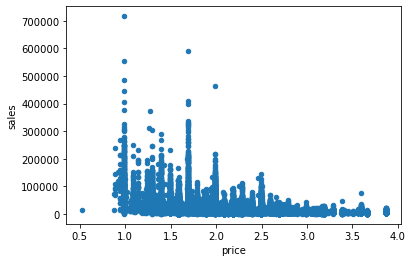

In [7]:
oj.plot.scatter(x='price', y='sales') #oj.plot(kind='scatter', x='price', y='sales')

<AxesSubplot:xlabel='price', ylabel='sales'>

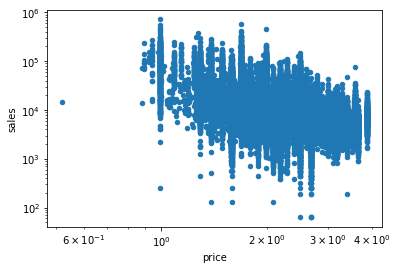

In [8]:
oj.plot.scatter(x='price', y='sales', loglog=True)

brand
dominicks      AxesSubplot(0.125,0.125;0.775x0.755)
minute.maid    AxesSubplot(0.125,0.125;0.775x0.755)
tropicana      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

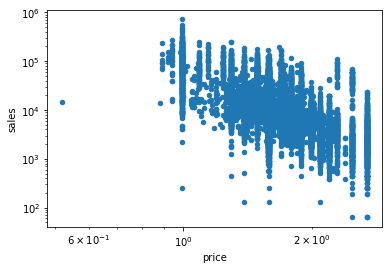

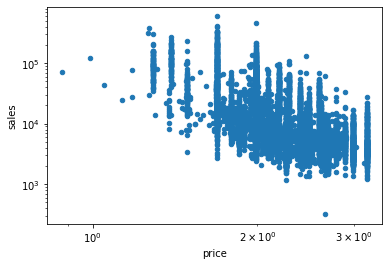

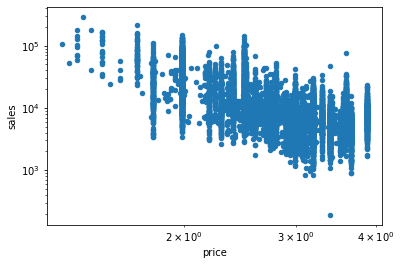

In [9]:
oj.groupby('brand').plot(kind='scatter', x='price', y='sales', loglog=True) #oj.groupby('brand').plot.scatter(x='price', y='sales', loglog=True)

<AxesSubplot:xlabel='price', ylabel='sales'>

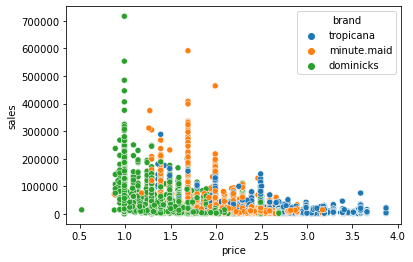

In [10]:
sns.scatterplot(x='price', y='sales', hue='brand',data = oj)

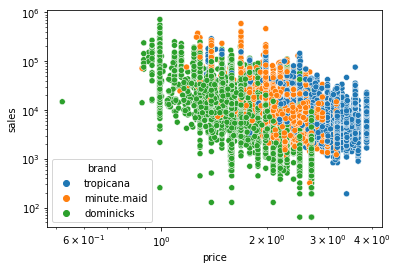

In [11]:
sns.scatterplot(x='price', y='sales', hue='brand',data = oj)
plt.xscale('log')
plt.yscale('log')

<AxesSubplot:xlabel='brand', ylabel='price'>

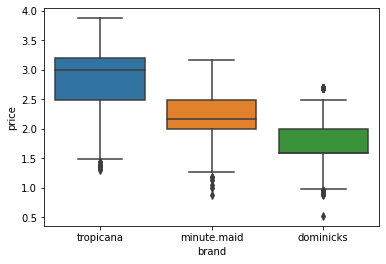

In [12]:
sns.boxplot(x='brand', y='price', data=oj)

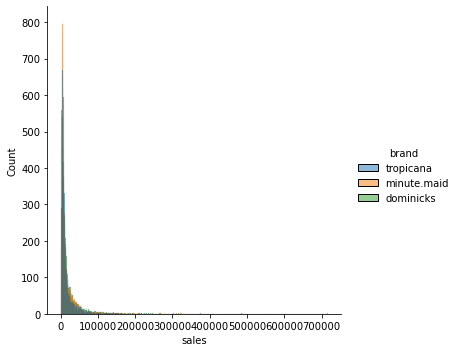

In [13]:
sns.displot(data=oj, x='sales', hue='brand')

In [14]:
oj['sales_log'] = np.log(oj['sales'])
oj['price_log'] = np.log(oj['price'])

In [15]:
import statsmodels.api as sm
#from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from patsy import dmatrices

In [16]:
y, X = dmatrices('sales_log ~ price_log + brand', data = oj, return_type='dataframe')

In [17]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              sales_log   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     6275.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:18:08   Log-Likelihood:                -34377.
No. Observations:               28947   AIC:                         6.876e+04
Df Residuals:                   28943   BIC:                         6.880e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.8288 

In [18]:
res2 = smf.ols("sales_log ~ price_log", data = oj).fit()

In [19]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:              sales_log   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     7608.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:18:08   Log-Likelihood:                -38251.
No. Observations:               28947   AIC:                         7.651e+04
Df Residuals:                   28945   BIC:                         7.652e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4234      0.015    679.043      0.0

In [20]:
res3 = smf.ols("sales_log ~ price_log * brand", data = oj).fit() # can also use ":" for the same intercept
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:              sales_log   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     3823.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:18:08   Log-Likelihood:                -34289.
No. Observations:               28947   AIC:                         6.859e+04
Df Residuals:                   28941   BIC:                         6.864e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [21]:
res4 = smf.ols("sales_log ~ price_log * brand * ad", data = oj).fit() # can also use ":" for the same intercept
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:              sales_log   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     3031.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        22:18:09   Log-Likelihood:                -30534.
No. Observations:               28947   AIC:                         6.109e+04
Df Residuals:                   28935   BIC:                         6.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

<AxesSubplot:ylabel='Count'>

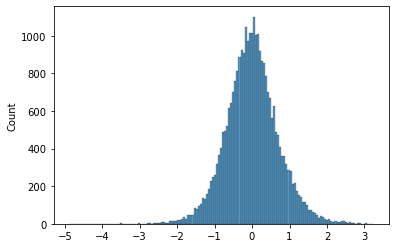

In [22]:
sns.histplot(res4.resid)

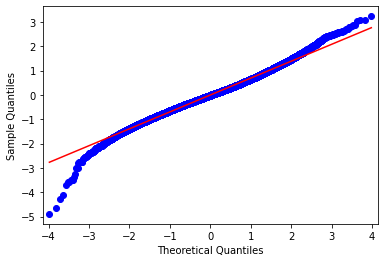

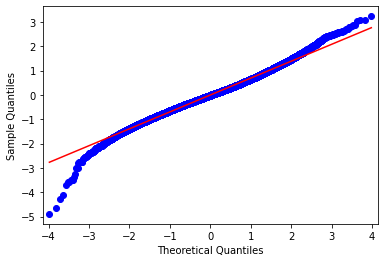

In [23]:
sm.qqplot(res4.resid, line='s')

In [24]:
pre4 = res4.predict(oj[["brand", "ad", "price_log"]])

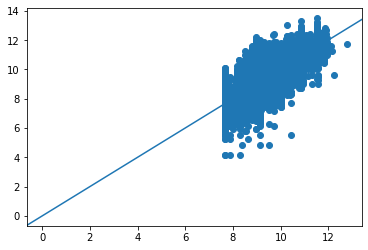

In [25]:
plt.scatter(pre4, oj["sales_log"]) ## all basic plot without
#sns.lineplot(x=pre4, y=oj["sales_log"], color='red')
plt.axline([0, 0], [1, 1])

In [26]:
df_resid = pd.DataFrame({"fitted":pre4, "observed":oj["sales_log"], "brand":oj["brand"]})
print(df_resid.head())

     fitted  observed      brand
0  8.356095  9.018695  tropicana
1  8.356095  8.723231  tropicana
2  8.356095  8.253228  tropicana
3  8.356095  8.987197  tropicana
4  8.356095  9.093357  tropicana


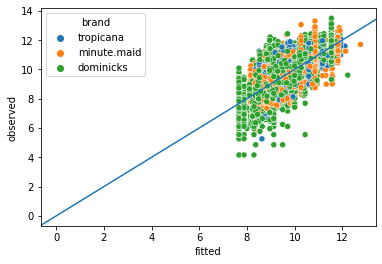

In [27]:
sns.scatterplot(x="fitted", y="observed", hue="brand", data = df_resid)
plt.axline([0, 0], [1, 1])

In [31]:
spammy = pd.read_csv("Spam.csv")
spammy.head()

,word_make,word_address,word_all,word_3d,word_our,word_over,word_remove,word_internet,word_order,word_mail,...,char_semicolon,char_leftbrac,char_leftsquarebrac,char_exclaim,char_dollar,char_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,3.756,61,278,1
1,1,1,1,0,1,1,1,1,0,1,...,0,1,0,1,1,1,5.114,101,1028,1
2,1,0,1,0,1,1,1,1,1,1,...,1,1,0,1,1,1,9.821,485,2259,1
3,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,3.537,40,191,1
4,0,0,0,0,1,0,1,1,1,1,...,0,1,0,1,0,0,3.537,40,191,1


In [34]:
spammy.dtypes

word_make                       int64
word_address                    int64
word_all                        int64
word_3d                         int64
word_our                        int64
word_over                       int64
word_remove                     int64
word_internet                   int64
word_order                      int64
word_mail                       int64
word_receive                    int64
word_will                       int64
word_people                     int64
word_report                     int64
word_addresses                  int64
word_free                       int64
word_business                   int64
word_email                      int64
word_you                        int64
word_credit                     int64
word_your                       int64
word_font                       int64
word_000                        int64
word_money                      int64
word_hp                         int64
word_hpl                        int64
word_george 

In [35]:
spammy.shape

(4601, 58)

In [47]:
'+ '.join(spammy.columns.tolist())

'word_make+ word_address+ word_all+ word_3d+ word_our+ word_over+ word_remove+ word_internet+ word_order+ word_mail+ word_receive+ word_will+ word_people+ word_report+ word_addresses+ word_free+ word_business+ word_email+ word_you+ word_credit+ word_your+ word_font+ word_000+ word_money+ word_hp+ word_hpl+ word_george+ word_650+ word_lab+ word_labs+ word_telnet+ word_857+ word_data+ word_415+ word_85+ word_technology+ word_1999+ word_parts+ word_pm+ word_direct+ word_cs+ word_meeting+ word_original+ word_project+ word_re+ word_edu+ word_table+ word_conference+ char_semicolon+ char_leftbrac+ char_leftsquarebrac+ char_exclaim+ char_dollar+ char_pound+ capital_run_length_average+ capital_run_length_longest+ capital_run_length_total+ spam'

In [52]:
test = '+ '.join(spammy.columns)

In [53]:
f"spam ~ {test}"

'spam ~ word_make+ word_address+ word_all+ word_3d+ word_our+ word_over+ word_remove+ word_internet+ word_order+ word_mail+ word_receive+ word_will+ word_people+ word_report+ word_addresses+ word_free+ word_business+ word_email+ word_you+ word_credit+ word_your+ word_font+ word_000+ word_money+ word_hp+ word_hpl+ word_george+ word_650+ word_lab+ word_labs+ word_telnet+ word_857+ word_data+ word_415+ word_85+ word_technology+ word_1999+ word_parts+ word_pm+ word_direct+ word_cs+ word_meeting+ word_original+ word_project+ word_re+ word_edu+ word_table+ word_conference+ char_semicolon+ char_leftbrac+ char_leftsquarebrac+ char_exclaim+ char_dollar+ char_pound+ capital_run_length_average+ capital_run_length_longest+ capital_run_length_total+ spam'

In [55]:
spamfit = smf.logit(f"spam ~ {test}", data = spammy).fit()

PerfectSeparationError: Perfect separation detected, results not available

# practice plotting

In [ ]:
#fig, axes = plt.subplots(2, 2, sharex=True, sharey = True)

In [ ]:
axes[0, 0].hist(np.random.standard_normal(1000), bins=50, alpha=0.3, label='standard normal')
axes[0, 0].hist(np.random.normal(10, 5, 1000), bins = 50, alpha=0.3, label = 'normal 10')
axes[0, 0].legend()
axes[1, 0].plot(np.random.standard_normal(100).cumsum())

In [ ]:
axes[0, 1].hist(np.random.standard_normal(500), bins = 50)

In [ ]:
fig.subplots_adjust(wspace = 0, hspace = 0)